Author : Namita Rana

### Project Name

Time Series Analysis on Monthly Crime Rates in Seattle.

## Dataset Details

## Dataset Name : SPD Crime Data: 2008-Present

* The data were collected from Seattle Police Department. The data covered the reported offenses and offense categorization coded to simulate the standard reported to the FBI under the National Incident Based Reporting System (NIBRS) in Seattle from February 2010 to February, 2020. In its original form, it had detailed variables including offense ID, sector,offense Parent Group,Precinct, Sector,Offense, and so on. Each row contains the record of a unique event where at least one criminal offense was reported by a member of the community or detected by an officer in the field.

### What's in this Dataset? : 

* Total : 962145 rows × 17 columns

### Columns:

* Column Name : Description
* Report Number: Primary key/UID for the overall report. One report can contain multiple offenses, as denoted by the Offense ID.
* Offense ID: Distinct identifier to denote when there are multiple offenses associated with a single report.
* Offense Start DateTime: Start date and time the offense(s) occurred.
* Offense End DateTime: End date and time the offense(s) occurred, when applicable.
* Report DateTime: Date and time the offense(s) was reported. (Can differ from date of occurrence)
* Group A B: Corresponding offense group.
* Crime Against Category: Corresponding offense crime against category.
* Offense Parent Group: Offense_Parent_Group
* Offense: Corresponding offense.
* Offense Code: Corresponding offense code.
* Precinct: Designated police precinct boundary where offense(s) occurred.
* Sector: Designated police sector boundary where offense(s) occurred.
* Beat: Designated police sector boundary where offense(s) occurred.
* MCPP: Designated Micro-Community Policing Plans (MCPP) boundary where offense(s) occurred.
* 100 Block Address: Offense(s) address location blurred to the one hundred block.
* Longitude: Offense(s) spatial coordinate blurred to the one hundred block.
* Latitude: Offense(s) spatial coordinate blurred to the one hundred block.


## Business Problem:

The goal of this analysis is to explore the crime rates ,to figure out which crimes are more frequent, and to make predictions for the number of monthly violent crimes that will occur in future months.

Stakeholder: Seattle Police Department.

### Background:

Seattle is the home place of grunge music, a tech hub and a city that prides itself in progress and innovation. It is a beautiful city that is surrounded by lush landscapes and deserves a place on your itinerary.

According to the most recent data from the FBI, the total crime rate in Seattle is 5,081.0 per 100,000 people. That's 105.15% higher than the national rate of 2,476.7 per 100,000 people and 70.75% higher than the Washington total crime rate of 2,975.8 per 100,000 people.

Seattle saw substantial spikes in the number of aggravated assaults and robberies last year, which were largely responsible for the 20% overall increase in violent crime the city experienced in 2021, according to the Seattle Police Department’s year-end crime report.

That report, released late last week, said the number of aggravated assaults that occurred in Seattle last year — 3,925 — is the most the city has seen in 10 years. It also represents a 24% increase over 2020 totals.

In [ ]:
#Importing the libraries.
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import svm
from sklearn.metrics import f1_score, balanced_accuracy_score, plot_confusion_matrix, classification_report
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#obtain the data and read the file.
df = pd.read_csv('SPD_Crime_Data__2008-Present.csv', index_col= False)
df

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962140,2013-247888,7687554356,07/13/2013 01:00:00 AM,NaN,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,SW,F,F1,PIGEON POINT,41XX BLOCK OF 20TH AVE SW,-122.359028,47.565702
962141,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 06:30:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251
962142,2012-045494,7672915592,02/14/2012 03:04:00 PM,NaN,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,N,U,U1,ROOSEVELT/RAVENNA,73XX BLOCK OF ROOSEVELT WAY NE,-122.317464,47.681894
962143,2010-328592,7692227482,09/19/2010 04:59:00 PM,NaN,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,W,M,M3,DOWNTOWN COMMERCIAL,5XX BLOCK OF PIKE ST,-122.335018,47.610909


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962145 entries, 0 to 962144
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Report Number           962145 non-null  object 
 1   Offense ID              962145 non-null  int64  
 2   Offense Start DateTime  961188 non-null  object 
 3   Offense End DateTime    530966 non-null  object 
 4   Report DateTime         962145 non-null  object 
 5   Group A B               962145 non-null  object 
 6   Crime Against Category  962145 non-null  object 
 7   Offense Parent Group    962145 non-null  object 
 8   Offense                 962145 non-null  object 
 9   Offense Code            962145 non-null  object 
 10  Precinct                962141 non-null  object 
 11  Sector                  962143 non-null  object 
 12  Beat                    962143 non-null  object 
 13  MCPP                    962142 non-null  object 
 14  100 Block Address   

In [4]:
df['Offense Code'].unique()

array(['35A', '23G', '120', '290', '90D', '23C', '23F', '26E', '23D',
       '100', '250', '23H', '370', '210', '240', '11B', '280', '26A',
       '26B', '270', '26F', '26C', '520', '11D', '26G', '35B', '200',
       '64A', '90G', '90A', '23A', '11A', '11C', '40C', '23B', '90F',
       '23E', '90B', '720', '09A', '40A', '26D', '90H', '40B', '90E',
       '09C', '36A', '36B', '510', '39B', '39A', '09B', '39C', '90J',
       '13B', '13A', '13C', '220', '64B'], dtype=object)

In [5]:
df['Precinct'].unique()

array(['W', 'N', 'SW', 'E', 'S', 'UNKNOWN', 'OOJ', nan, '<Null>'],
      dtype=object)

In [6]:
df['Sector'].unique()

array(['Q', 'J', 'U', 'B', 'M', 'F', 'L', 'E', 'R', 'O', 'K', 'C', 'N',
       'G', 'W', 'D', 'S', '99', 'UNKNOWN', '9512', 'SE', 'W2', 'OOJ',
       nan, '<Null>', '6804', '1700'], dtype=object)

In [7]:
df['Beat'].unique()

array(['Q1', 'J3', 'U3', 'B2', 'M1', 'F2', 'L2', 'E2', 'U2', 'R3', 'R1',
       'E1', 'O3', 'Q3', 'O2', 'K2', 'Q2', 'C3', 'N2', 'G2', 'W2', 'K1',
       'B3', 'M3', 'W3', 'W1', 'D2', 'K3', 'D3', 'G1', 'R2', 'E3', 'F3',
       'N1', 'D1', 'U1', 'F1', 'G3', 'B1', 'N3', 'M2', 'C2', 'S3', 'L1',
       'S1', 'J1', 'J2', 'S2', 'L3', 'C1', 'O1', '99', 'UNKNOWN', 'OOJ',
       nan, '<Null>'], dtype=object)

In [8]:
df['Offense ID'].unique()

array([12605873663, 12605598696, 12605567653, ...,  7672915592,
        7692227482,  7686420892])

In [9]:
df.isna().sum()

Report Number                  0
Offense ID                     0
Offense Start DateTime       957
Offense End DateTime      431179
Report DateTime                0
Group A B                      0
Crime Against Category         0
Offense Parent Group           0
Offense                        0
Offense Code                   0
Precinct                       4
Sector                         2
Beat                           2
MCPP                           3
100 Block Address          38034
Longitude                      0
Latitude                       0
dtype: int64

In [10]:
df['Group A B' ].unique()

array(['A', 'B'], dtype=object)

In [11]:
df['Sector'].value_counts()

U          75417
B          69518
M          68592
K          67472
E          67455
D          63797
Q          61666
R          59704
L          58680
N          54654
J          50850
W          49162
S          48900
F          46860
C          42899
G          40146
O          29862
UNKNOWN     6404
99            91
OOJ            7
1700           2
<Null>         1
6804           1
SE             1
9512           1
W2             1
Name: Sector, dtype: int64

In [12]:
df.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193


In [13]:
#convert to datetime
df["date"] = pd.to_datetime(df["Offense Start DateTime"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day_of_week"] = df["date"].dt.day_name()
df["hour"] = df["date"].dt.hour
df["Date"] = df["date"].dt.date
df = df.drop("date", axis=1)
df

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,...,Beat,MCPP,100 Block Address,Longitude,Latitude,year,month,day_of_week,hour,Date
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,...,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020.0,2.0,Wednesday,10.0,2020-02-05
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,...,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020.0,2.0,Monday,8.0,2020-02-03
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,...,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020.0,2.0,Sunday,20.0,2020-02-02
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,...,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,2020.0,2.0,Wednesday,1.0,2020-02-05
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,...,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193,2020.0,2.0,Wednesday,0.0,2020-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962140,2013-247888,7687554356,07/13/2013 01:00:00 AM,NaN,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,...,F1,PIGEON POINT,41XX BLOCK OF 20TH AVE SW,-122.359028,47.565702,2013.0,7.0,Saturday,1.0,2013-07-13
962141,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 06:30:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,...,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251,2013.0,6.0,Wednesday,11.0,2013-06-26
962142,2012-045494,7672915592,02/14/2012 03:04:00 PM,NaN,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,...,U1,ROOSEVELT/RAVENNA,73XX BLOCK OF ROOSEVELT WAY NE,-122.317464,47.681894,2012.0,2.0,Tuesday,15.0,2012-02-14
962143,2010-328592,7692227482,09/19/2010 04:59:00 PM,NaN,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,...,M3,DOWNTOWN COMMERCIAL,5XX BLOCK OF PIKE ST,-122.335018,47.610909,2010.0,9.0,Sunday,16.0,2010-09-19


In [14]:
# Map day values to proper strings
dmap1 = {1.0:'January',2.0:'February',3.0:'March',4.0:'April',5.0:'May',6.0:'June',7.0:'July',8.0:'August',9.0:'September',10.0:'Ocotober',11.0:'November',12.0:'December'}
df['month'] = df['month'].map(dmap1)
df

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,...,Beat,MCPP,100 Block Address,Longitude,Latitude,year,month,day_of_week,hour,Date
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,...,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020.0,February,Wednesday,10.0,2020-02-05
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,...,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020.0,February,Monday,8.0,2020-02-03
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,...,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020.0,February,Sunday,20.0,2020-02-02
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,...,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,2020.0,February,Wednesday,1.0,2020-02-05
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,...,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193,2020.0,February,Wednesday,0.0,2020-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962140,2013-247888,7687554356,07/13/2013 01:00:00 AM,NaN,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,...,F1,PIGEON POINT,41XX BLOCK OF 20TH AVE SW,-122.359028,47.565702,2013.0,July,Saturday,1.0,2013-07-13
962141,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 06:30:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,...,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251,2013.0,June,Wednesday,11.0,2013-06-26
962142,2012-045494,7672915592,02/14/2012 03:04:00 PM,NaN,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,...,U1,ROOSEVELT/RAVENNA,73XX BLOCK OF ROOSEVELT WAY NE,-122.317464,47.681894,2012.0,February,Tuesday,15.0,2012-02-14
962143,2010-328592,7692227482,09/19/2010 04:59:00 PM,NaN,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,...,M3,DOWNTOWN COMMERCIAL,5XX BLOCK OF PIKE ST,-122.335018,47.610909,2010.0,September,Sunday,16.0,2010-09-19


In [15]:
#from time import strptime
#df['Month'] = df['Month'].apply(lambda x: strptime(x,'%b').tm_mon) 

In [16]:
#Dropping unncessary columns:
# Will be keeping offence Parent Group and droppiing offense, offense end datetime,Beat,100 Block Address ,
#
df_new = df.drop(columns =['Offense End DateTime','Offense','100 Block Address'],axis=1)
df_new

,Report Number,Offense ID,Offense Start DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense Code,Precinct,Sector,Beat,MCPP,Longitude,Latitude,year,month,day_of_week,hour,Date
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,35A,W,Q,Q1,MAGNOLIA,-122.385974,47.649387,2020.0,February,Wednesday,10.0,2020-02-05
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,23G,N,J,J3,ROOSEVELT/RAVENNA,-122.323399,47.675118,2020.0,February,Monday,8.0,2020-02-03
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,120,N,U,U3,ROOSEVELT/RAVENNA,-122.299552,47.666384,2020.0,February,Sunday,20.0,2020-02-02
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,290,W,Q,Q1,MAGNOLIA,-122.384865,47.642927,2020.0,February,Wednesday,1.0,2020-02-05
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,90D,N,B,B2,BALLARD SOUTH,-122.366195,47.662193,2020.0,February,Wednesday,0.0,2020-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962140,2013-247888,7687554356,07/13/2013 01:00:00 AM,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,240,SW,F,F1,PIGEON POINT,-122.359028,47.565702,2013.0,July,Saturday,1.0,2013-07-13
962141,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,240,W,Q,Q3,QUEEN ANNE,-122.355386,47.626251,2013.0,June,Wednesday,11.0,2013-06-26
962142,2012-045494,7672915592,02/14/2012 03:04:00 PM,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,23C,N,U,U1,ROOSEVELT/RAVENNA,-122.317464,47.681894,2012.0,February,Tuesday,15.0,2012-02-14
962143,2010-328592,7692227482,09/19/2010 04:59:00 PM,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,23C,W,M,M3,DOWNTOWN COMMERCIAL,-122.335018,47.610909,2010.0,September,Sunday,16.0,2010-09-19


In [17]:
df_new['Date'].value_counts()

2020-05-18    764
2020-05-15    667
2020-03-08    658
2020-05-14    621
2020-05-20    584
             ... 
2000-03-03      1
2006-11-26      1
2001-06-23      1
2006-12-15      1
2005-04-04      1
Name: Date, Length: 5865, dtype: int64

In [18]:
df_new['dt_Year'] = pd.to_datetime(df_new.Date,format='%Y',exact=False)

In [19]:
df_new

,Report Number,Offense ID,Offense Start DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense Code,Precinct,Sector,Beat,MCPP,Longitude,Latitude,year,month,day_of_week,hour,Date,dt_Year
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,35A,W,Q,Q1,MAGNOLIA,-122.385974,47.649387,2020.0,February,Wednesday,10.0,2020-02-05,2020-01-01
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,23G,N,J,J3,ROOSEVELT/RAVENNA,-122.323399,47.675118,2020.0,February,Monday,8.0,2020-02-03,2020-01-01
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,120,N,U,U3,ROOSEVELT/RAVENNA,-122.299552,47.666384,2020.0,February,Sunday,20.0,2020-02-02,2020-01-01
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,290,W,Q,Q1,MAGNOLIA,-122.384865,47.642927,2020.0,February,Wednesday,1.0,2020-02-05,2020-01-01
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,90D,N,B,B2,BALLARD SOUTH,-122.366195,47.662193,2020.0,February,Wednesday,0.0,2020-02-05,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962140,2013-247888,7687554356,07/13/2013 01:00:00 AM,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,240,SW,F,F1,PIGEON POINT,-122.359028,47.565702,2013.0,July,Saturday,1.0,2013-07-13,2013-01-01
962141,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,240,W,Q,Q3,QUEEN ANNE,-122.355386,47.626251,2013.0,June,Wednesday,11.0,2013-06-26,2013-01-01
962142,2012-045494,7672915592,02/14/2012 03:04:00 PM,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,23C,N,U,U1,ROOSEVELT/RAVENNA,-122.317464,47.681894,2012.0,February,Tuesday,15.0,2012-02-14,2012-01-01
962143,2010-328592,7692227482,09/19/2010 04:59:00 PM,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,23C,W,M,M3,DOWNTOWN COMMERCIAL,-122.335018,47.610909,2010.0,September,Sunday,16.0,2010-09-19,2010-01-01


In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962145 entries, 0 to 962144
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Report Number           962145 non-null  object        
 1   Offense ID              962145 non-null  int64         
 2   Offense Start DateTime  961188 non-null  object        
 3   Report DateTime         962145 non-null  object        
 4   Group A B               962145 non-null  object        
 5   Crime Against Category  962145 non-null  object        
 6   Offense Parent Group    962145 non-null  object        
 7   Offense Code            962145 non-null  object        
 8   Precinct                962141 non-null  object        
 9   Sector                  962143 non-null  object        
 10  Beat                    962143 non-null  object        
 11  MCPP                    962142 non-null  object        
 12  Longitude               962145

In [21]:
df_new.reset_index(drop=True, inplace=True)
df_new

,Report Number,Offense ID,Offense Start DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense Code,Precinct,Sector,Beat,MCPP,Longitude,Latitude,year,month,day_of_week,hour,Date,dt_Year
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,35A,W,Q,Q1,MAGNOLIA,-122.385974,47.649387,2020.0,February,Wednesday,10.0,2020-02-05,2020-01-01
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,23G,N,J,J3,ROOSEVELT/RAVENNA,-122.323399,47.675118,2020.0,February,Monday,8.0,2020-02-03,2020-01-01
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,120,N,U,U3,ROOSEVELT/RAVENNA,-122.299552,47.666384,2020.0,February,Sunday,20.0,2020-02-02,2020-01-01
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,290,W,Q,Q1,MAGNOLIA,-122.384865,47.642927,2020.0,February,Wednesday,1.0,2020-02-05,2020-01-01
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,90D,N,B,B2,BALLARD SOUTH,-122.366195,47.662193,2020.0,February,Wednesday,0.0,2020-02-05,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962140,2013-247888,7687554356,07/13/2013 01:00:00 AM,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,240,SW,F,F1,PIGEON POINT,-122.359028,47.565702,2013.0,July,Saturday,1.0,2013-07-13,2013-01-01
962141,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,240,W,Q,Q3,QUEEN ANNE,-122.355386,47.626251,2013.0,June,Wednesday,11.0,2013-06-26,2013-01-01
962142,2012-045494,7672915592,02/14/2012 03:04:00 PM,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,23C,N,U,U1,ROOSEVELT/RAVENNA,-122.317464,47.681894,2012.0,February,Tuesday,15.0,2012-02-14,2012-01-01
962143,2010-328592,7692227482,09/19/2010 04:59:00 PM,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,23C,W,M,M3,DOWNTOWN COMMERCIAL,-122.335018,47.610909,2010.0,September,Sunday,16.0,2010-09-19,2010-01-01


In [22]:
#setting dt_Year as index:
#df_new.set_index('dt_Year',inplace=True)
#df_new.head(20)

/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


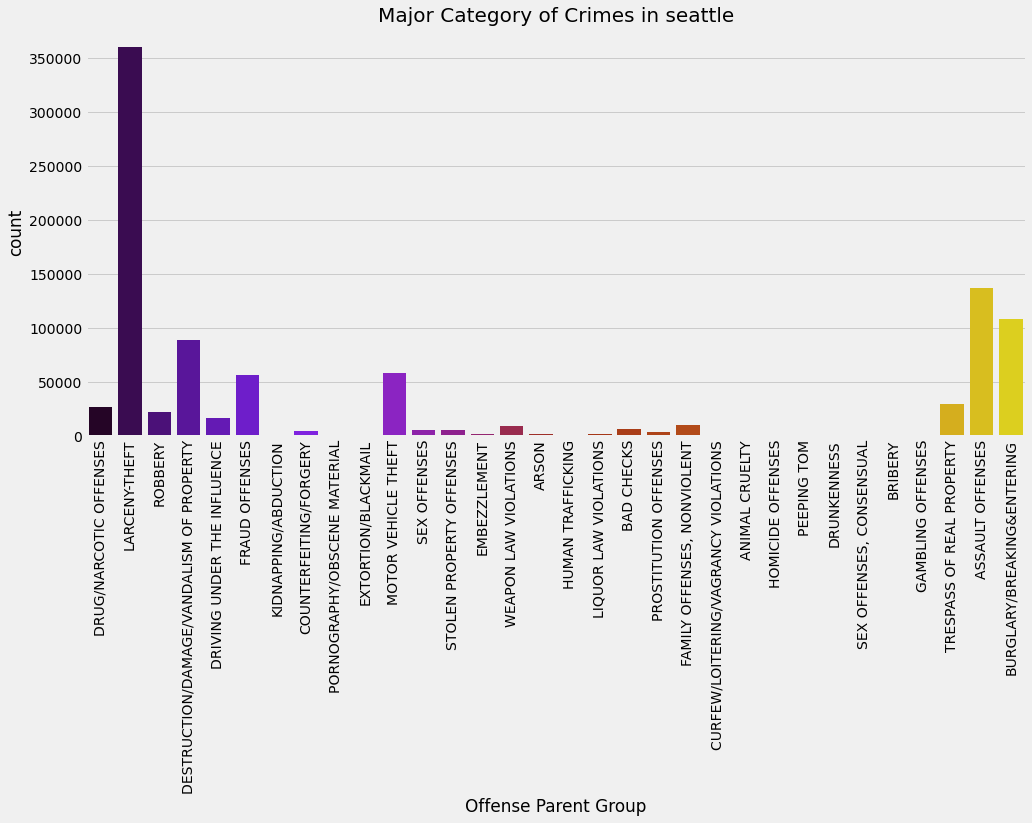

In [23]:
#Different categories of crime:
# different categories of crime

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')

sns.countplot(df_new['Offense Parent Group'], palette = 'gnuplot',color='Black')
plt.title('Major Category of Crimes in seattle', fontweight = 30, fontsize = 20,color='Black')
plt.xticks(rotation = 90)
plt.show()

/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


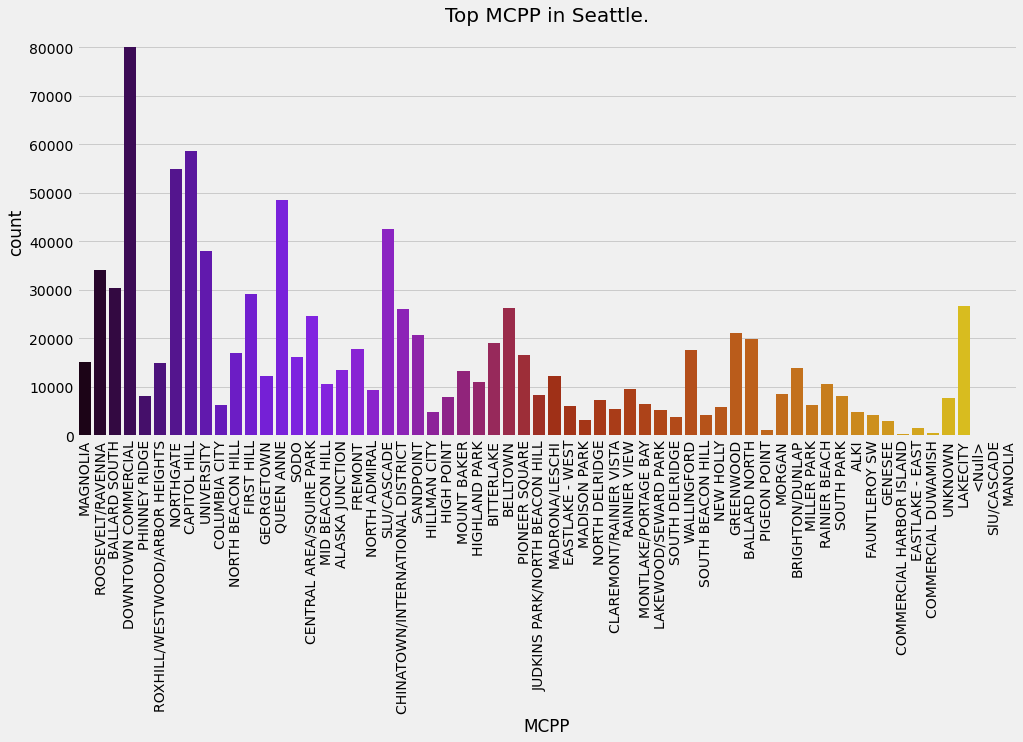

In [24]:
#Top MCPP :

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 15))
sns.countplot(df_new['MCPP'], palette = 'gnuplot',color=color)
plt.title('Top MCPP in Seattle.', fontweight = 30, fontsize = 20,color='Black')
plt.xticks(rotation = 90)
plt.show()

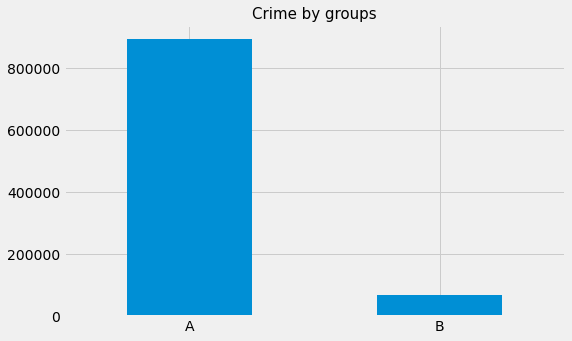

In [25]:
#crime by Groups:
plt.rcParams['figure.figsize'] = (8, 5)
plt.style.use('fivethirtyeight')

color = plt.cm.spring(np.linspace(0, 1, 5))
df_new['Group A B'].value_counts().plot.bar()

plt.title('Crime by groups',fontsize =15,color ='Black')
plt.xticks(rotation = 360)
plt.show()

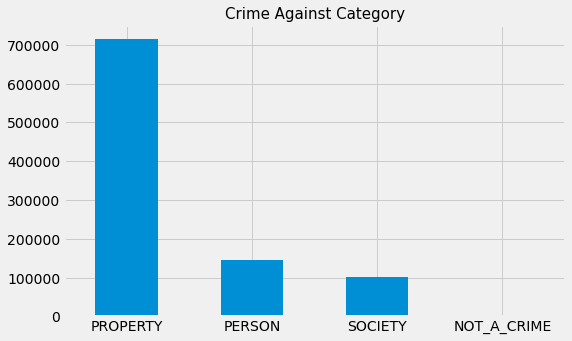

In [26]:
#plt.rcParams['figure.figsize'] = (8, 5)
plt.style.use('fivethirtyeight')

color = plt.cm.spring(np.linspace(0, 1, 5))
df_new['Crime Against Category'].value_counts().plot.bar()

plt.title('Crime Against Category',fontsize =15,color ='Black')
plt.xticks(rotation = 360)
plt.show()

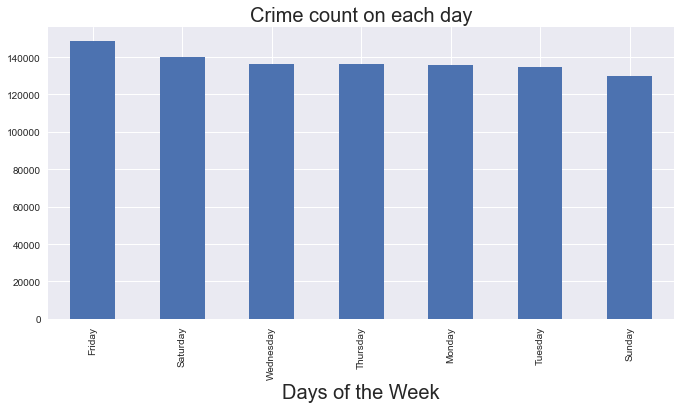

In [27]:
#Crime count by weekdays:
plt.style.use('seaborn')

color = plt.cm.cool(np.linspace(0, 1, 15))
df_new['day_of_week'].value_counts().sort_index(ascending=False).sort_values(ascending=False).head(15).plot.bar(figsize = (10, 5))
plt.xlabel("Days of the Week",fontsize=20)
plt.title('Crime count on each day',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


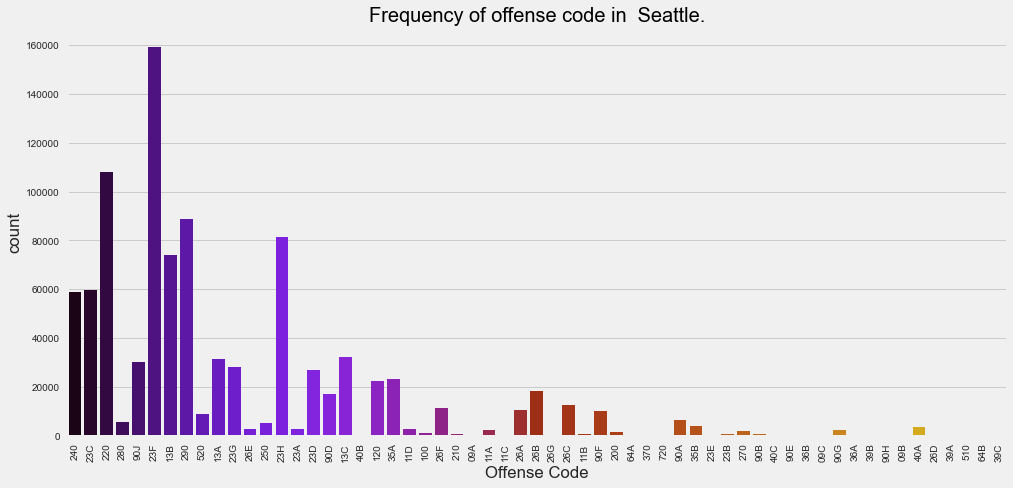

In [28]:
#Frequency of offense code::

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 15))
sns.countplot(df_new['Offense Code'].sort_index(ascending=False), palette = 'gnuplot',color=color)
plt.title('Frequency of offense code in  Seattle.', fontweight = 30, fontsize = 20,color='Black')
plt.xticks(rotation = 90)
plt.show()

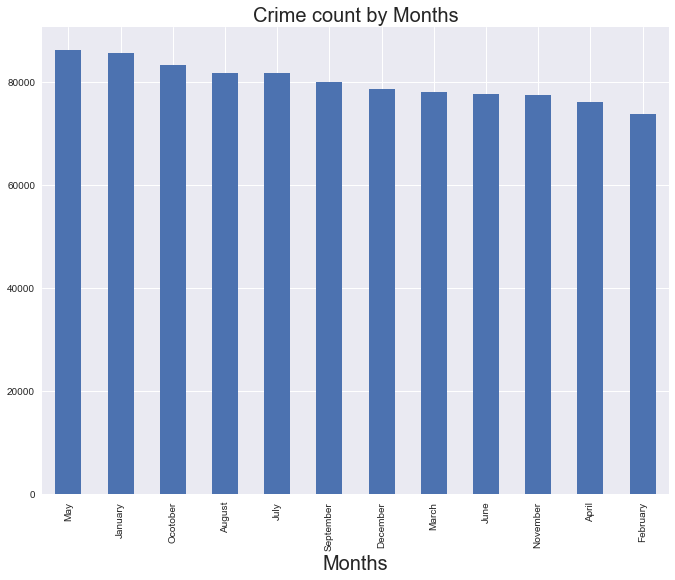

In [29]:
#Crime count by Month:
plt.style.use('seaborn')

color = plt.cm.cool(np.linspace(0, 1, 15))
df_new['month'].value_counts().sort_index(ascending=False).sort_values(ascending=False).head(15).plot.bar( figsize = (10, 8))
plt.xlabel("Months",fontsize=20)
plt.title('Crime count by Months',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:title={'center':'No of Crimes vs. Time of Day'}, xlabel='hour'>

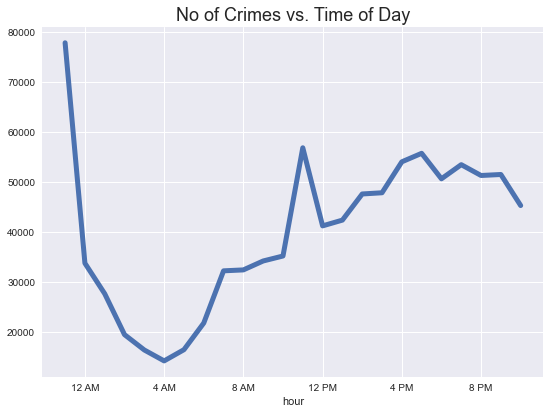

In [30]:
#crimes per hour
#Create line plot of crimes per hour
crime_per_hour = df_new.groupby("hour").count()
plt.title("No of Crimes vs. Time of Day",fontsize=18)
plt.xticks(np.arange(1,24,4),['12 AM','4 AM','8 AM','12 PM','4 PM','8 PM'])
crime_per_hour['Offense Parent Group'].plot(figsize=(8,6),label='Total',lw=5)

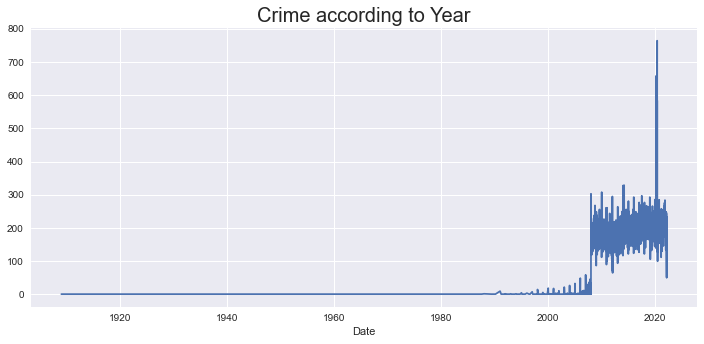

In [31]:
#Lets plot a line plot to plot crimes accoriding to date
plt.figure(figsize=(10,5))
df_new.groupby('Date').count()['Offense Parent Group'].plot();
plt.title('Crime according to Year', fontsize=20)
plt.tight_layout()

In [32]:
#Lets create a table with the highest no of crimes in Seattle.
crime_dates = df_new[df_new["year"] == 2020]
top_10_days = pd.DataFrame(crime_dates["dt_Year"].value_counts().head(10))
top_10_days.reset_index(inplace=True)
top_10_days.columns=['Date','Count']
top_10_days.head(10)

,Date,Count
0,2020-01-01,76060


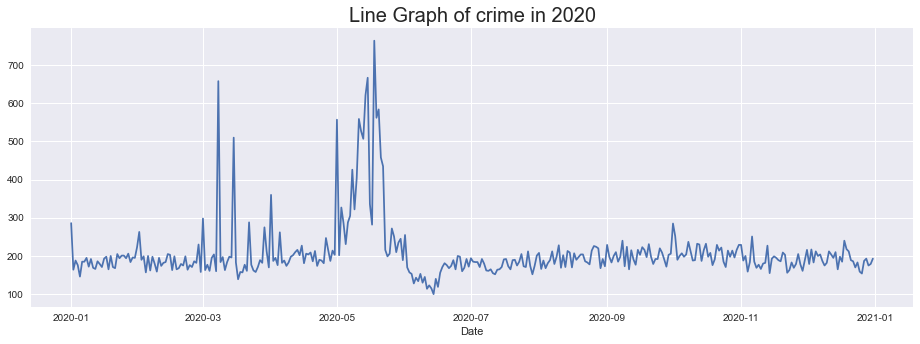

In [33]:
#Plot crimes according to days in 2020
crime_rate = df_new[df_new["year"] == 2020]
plt.figure(figsize=(13,5))
crime_rate.groupby('Date').count()['Offense Parent Group'].plot();
plt.title("Line Graph of crime in 2020",fontsize=20)
plt.tight_layout()

In [34]:
#counts by month:
crime_by_month = df_new[df_new["year"] ==2020]
top_10_counts =pd.DataFrame(crime_by_month["month"].value_counts().head(10))
top_10_counts.reset_index(inplace=True)
top_10_counts.columns = ['Month','Count']
top_10_counts.head(20)

,Month,Count
0,May,11673
1,March,6607
2,Ocotober,6519
3,April,6161
4,September,6036
5,August,6017
6,December,5962
7,January,5854
8,November,5608
9,July,5507


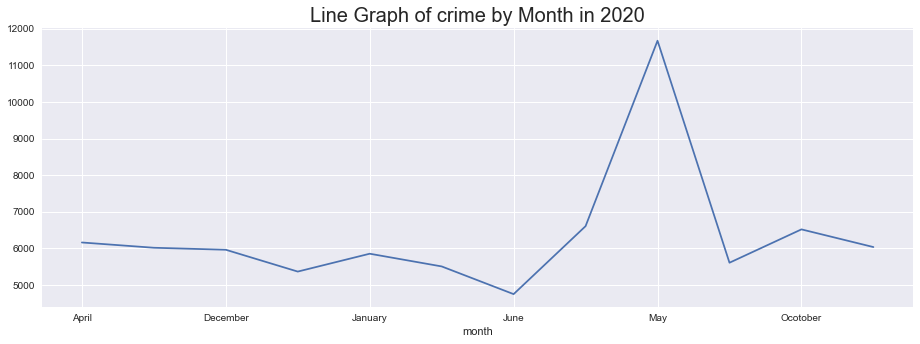

In [35]:
#Plot crimes according to days in 2020
crime_rate = df_new[df_new["year"] == 2020]

plt.figure(figsize=(13,5))
crime_rate.groupby('month').count()['Offense Parent Group'].plot();
plt.title("Line Graph of crime by Month in 2020",fontsize=20)
plt.tight_layout()

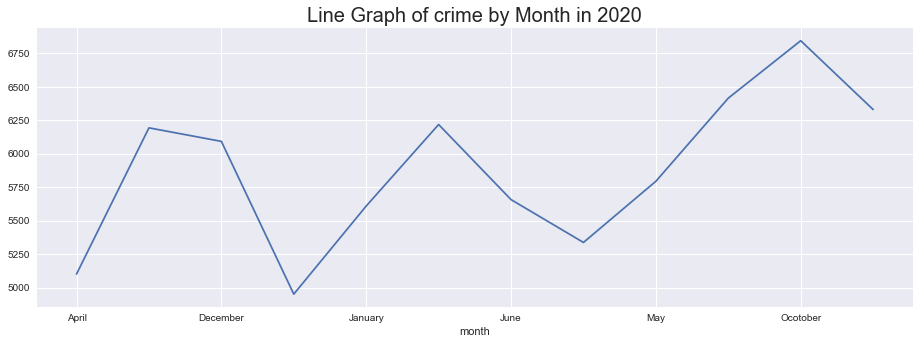

In [36]:
#Plot crimes according to days in 2020
crime_rate = df_new[df_new["year"] == 2021]

plt.figure(figsize=(13,5))
crime_rate.groupby('month').count()['Offense Parent Group'].plot();
plt.title("Line Graph of crime by Month in 2020",fontsize=20)
plt.tight_layout()

In [37]:
#df_new.set_index('Date',inplace=True)
#df_new.head(50)

In [38]:
df_new.tail()

,Report Number,Offense ID,Offense Start DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense Code,Precinct,Sector,Beat,MCPP,Longitude,Latitude,year,month,day_of_week,hour,Date,dt_Year
962140,2013-247888,7687554356,07/13/2013 01:00:00 AM,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,240,SW,F,F1,PIGEON POINT,-122.359028,47.565702,2013.0,July,Saturday,1.0,2013-07-13,2013-01-01
962141,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,240,W,Q,Q3,QUEEN ANNE,-122.355386,47.626251,2013.0,June,Wednesday,11.0,2013-06-26,2013-01-01
962142,2012-045494,7672915592,02/14/2012 03:04:00 PM,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,23C,N,U,U1,ROOSEVELT/RAVENNA,-122.317464,47.681894,2012.0,February,Tuesday,15.0,2012-02-14,2012-01-01
962143,2010-328592,7692227482,09/19/2010 04:59:00 PM,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,23C,W,M,M3,DOWNTOWN COMMERCIAL,-122.335018,47.610909,2010.0,September,Sunday,16.0,2010-09-19,2010-01-01
962144,2010-064656,7686420892,02/25/2010 06:00:00 PM,02/26/2010 07:54:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,240,W,Q,Q2,QUEEN ANNE,-122.355546,47.643681,2010.0,February,Thursday,18.0,2010-02-25,2010-01-01


In [39]:
#let's keep only the cloumns we need:
df_crime = df_new.drop(columns =['Report Number','Crime Against Category','Beat','Offense ID','Offense Start DateTime','Report DateTime','Group A B','Offense Code','Precinct','Sector','MCPP','Longitude','Latitude','hour'])
df_crime

,Offense Parent Group,year,month,day_of_week,Date,dt_Year
0,DRUG/NARCOTIC OFFENSES,2020.0,February,Wednesday,2020-02-05,2020-01-01
1,LARCENY-THEFT,2020.0,February,Monday,2020-02-03,2020-01-01
2,ROBBERY,2020.0,February,Sunday,2020-02-02,2020-01-01
3,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,2020.0,February,Wednesday,2020-02-05,2020-01-01
4,DRIVING UNDER THE INFLUENCE,2020.0,February,Wednesday,2020-02-05,2020-01-01
...,...,...,...,...,...,...
962140,MOTOR VEHICLE THEFT,2013.0,July,Saturday,2013-07-13,2013-01-01
962141,MOTOR VEHICLE THEFT,2013.0,June,Wednesday,2013-06-26,2013-01-01
962142,LARCENY-THEFT,2012.0,February,Tuesday,2012-02-14,2012-01-01
962143,LARCENY-THEFT,2010.0,September,Sunday,2010-09-19,2010-01-01


In [40]:
df_crime.isna().sum()

Offense Parent Group      0
year                    957
month                   957
day_of_week             957
Date                    957
dt_Year                 957
dtype: int64

In [41]:
df_crime= df_crime.dropna(axis=0, how='any')
df_crime

,Offense Parent Group,year,month,day_of_week,Date,dt_Year
0,DRUG/NARCOTIC OFFENSES,2020.0,February,Wednesday,2020-02-05,2020-01-01
1,LARCENY-THEFT,2020.0,February,Monday,2020-02-03,2020-01-01
2,ROBBERY,2020.0,February,Sunday,2020-02-02,2020-01-01
3,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,2020.0,February,Wednesday,2020-02-05,2020-01-01
4,DRIVING UNDER THE INFLUENCE,2020.0,February,Wednesday,2020-02-05,2020-01-01
...,...,...,...,...,...,...
962140,MOTOR VEHICLE THEFT,2013.0,July,Saturday,2013-07-13,2013-01-01
962141,MOTOR VEHICLE THEFT,2013.0,June,Wednesday,2013-06-26,2013-01-01
962142,LARCENY-THEFT,2012.0,February,Tuesday,2012-02-14,2012-01-01
962143,LARCENY-THEFT,2010.0,September,Sunday,2010-09-19,2010-01-01


In [42]:
df_crime.isna().sum()

Offense Parent Group    0
year                    0
month                   0
day_of_week             0
Date                    0
dt_Year                 0
dtype: int64

In [43]:
#Converting float year to int:
df_crime.year = df_crime.year.astype(int)

/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [44]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961188 entries, 0 to 962144
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Offense Parent Group  961188 non-null  object        
 1   year                  961188 non-null  int64         
 2   month                 961188 non-null  object        
 3   day_of_week           961188 non-null  object        
 4   Date                  961188 non-null  object        
 5   dt_Year               961188 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 51.3+ MB


In [45]:
df_crime['offense_counts'] = df_crime['Offense Parent Group']

<ipython-input-45-ebb9eae166f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crime['offense_counts'] = df_crime['Offense Parent Group']


In [46]:
crime_rate

,Report Number,Offense ID,Offense Start DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense Code,Precinct,Sector,Beat,MCPP,Longitude,Latitude,year,month,day_of_week,hour,Date,dt_Year
855961,2021-002024,19260363069,01/03/2021 07:50:00 PM,01/03/2021 09:17:54 PM,A,PROPERTY,STOLEN PROPERTY OFFENSES,280,N,L,L3,LAKECITY,-122.291503,47.715506,2021.0,January,Sunday,19.0,2021-01-03,2021-01-01
857680,2021-032356,20409706356,02/07/2021 06:38:00 PM,02/07/2021 07:37:11 PM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,290,N,N,N3,GREENWOOD,-122.344694,47.705051,2021.0,February,Sunday,18.0,2021-02-07,2021-01-01
857826,2021-045588,21421289970,02/15/2021 11:59:00 PM,02/23/2021 05:27:31 PM,A,PROPERTY,MOTOR VEHICLE THEFT,240,SW,W,W1,ALKI,-122.411306,47.578933,2021.0,February,Monday,23.0,2021-02-15,2021-01-01
858055,2021-039062,20881878784,02/16/2021 07:46:00 AM,02/16/2021 09:54:58 AM,A,PROPERTY,STOLEN PROPERTY OFFENSES,280,SW,F,F1,NORTH DELRIDGE,-122.364295,47.554506,2021.0,February,Tuesday,7.0,2021-02-16,2021-01-01
858273,2021-054304,21681081028,03/05/2021 04:16:00 AM,03/05/2021 05:05:24 AM,A,PROPERTY,STOLEN PROPERTY OFFENSES,280,S,O,O2,SODO,-122.322712,47.569829,2021.0,March,Friday,4.0,2021-03-05,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962123,2021-210204,26937951561,08/13/2021 08:28:00 PM,08/13/2021 09:12:43 PM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,290,S,O,O2,GEORGETOWN,0.000000,0.000000,2021.0,August,Friday,20.0,2021-08-13,2021-01-01
962124,2021-210204,26938167902,08/13/2021 08:28:00 PM,08/13/2021 09:12:43 PM,A,SOCIETY,WEAPON LAW VIOLATIONS,520,S,O,O2,GEORGETOWN,0.000000,0.000000,2021.0,August,Friday,20.0,2021-08-13,2021-01-01
962125,2021-209603,31723041119,08/13/2021 09:11:00 AM,08/13/2021 10:23:44 AM,A,PERSON,ASSAULT OFFENSES,13B,S,R,R3,COLUMBIA CITY,-122.282101,47.557841,2021.0,August,Friday,9.0,2021-08-13,2021-01-01
962126,2021-206747,31721990307,08/10/2021 03:05:00 PM,08/10/2021 06:24:31 PM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,290,S,R,R3,GENESEE,-122.278254,47.564089,2021.0,August,Tuesday,15.0,2021-08-10,2021-01-01


In [49]:
crime_rate.groupby('Date').count()['Offense Parent Group']

Date
2021-01-01    238
2021-01-02    164
2021-01-03    179
2021-01-04    203
2021-01-05    158
             ... 
2021-12-27    134
2021-12-28    139
2021-12-29    162
2021-12-30    178
2021-12-31    190
Name: Offense Parent Group, Length: 365, dtype: int64

In [51]:
crime_rate.groupby('Date').count()['Offense Parent Group']

Date
2021-01-01    238
2021-01-02    164
2021-01-03    179
2021-01-04    203
2021-01-05    158
             ... 
2021-12-27    134
2021-12-28    139
2021-12-29    162
2021-12-30    178
2021-12-31    190
Name: Offense Parent Group, Length: 365, dtype: int64

In [52]:
df_crime.groupby('Date').count()['Offense Parent Group'].to_frame(name='count').reset_index()

,Date,count
0,1908-12-13,1
1,1915-12-14,1
2,1920-09-23,1
3,1929-06-06,1
4,1953-04-20,1
...,...,...
5860,2022-02-23,162
5861,2022-02-24,145
5862,2022-02-25,145
5863,2022-02-26,111


In [53]:
#df4 = crime_rate.groupby(['year', 'month']).count()['Offense Parent Group'].to_frame(name='count').reset_index()

In [54]:
#df4

In [91]:
#monthly_count_2021 =[]
finalDataFrame = pd.DataFrame()
years =[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

for year in years:
    print(year)
    crime_rate = df_crime[df_crime["year"]== year]
    #monthly_count = pd.concat([monthly_count, crime_rate.groupby(['year', 'month']).count()['Offense Parent Group']])
    df2 = crime_rate.groupby(['year', 'month']).count()['Offense Parent Group'].to_frame(name='count').reset_index()
    if finalDataFrame.empty:
        #print('empty data frame')
        finalDataFrame = df2
    else:
        #print('non-empty data frame')
        finalDataFrame = finalDataFrame.append(df2, ignore_index=True)
#finalDataFrame= monthly_count.to_frame()
print(finalDataFrame)

2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
     year      month  count
0    2010      April   5199
1    2010     August   5292
2    2010   December   4992
3    2010   February   4680
4    2010    January   6059
..    ...        ...    ...
139  2021      March   5338
140  2021        May   5795
141  2021   November   6416
142  2021   Ocotober   6845
143  2021  September   6331

[144 rows x 3 columns]


In [92]:
#Our finaldataframe
finalDataFrame

,year,month,count
0,2010,April,5199
1,2010,August,5292
2,2010,December,4992
3,2010,February,4680
4,2010,January,6059
...,...,...,...
139,2021,March,5338
140,2021,May,5795
141,2021,November,6416
142,2021,Ocotober,6845


In [93]:
d = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'Ocotober':'10', 'November':'11', 'December':'12'}
''
finalDataFrame['yearMonth'] = pd.to_datetime(finalDataFrame['year'].astype(str) +"-"+ finalDataFrame['month'].map(d)+"-01")
finalDataFrame

,year,month,count,yearMonth
0,2010,April,5199,2010-04-01
1,2010,August,5292,2010-08-01
2,2010,December,4992,2010-12-01
3,2010,February,4680,2010-02-01
4,2010,January,6059,2010-01-01
...,...,...,...,...
139,2021,March,5338,2021-03-01
140,2021,May,5795,2021-05-01
141,2021,November,6416,2021-11-01
142,2021,Ocotober,6845,2021-10-01


In [94]:
#Creating our final Dtataframe and set_index as yearmonthdatetime.
finalDataFrame['yearMonthDateTime'] = pd.to_datetime(finalDataFrame['yearMonth'], format='%y-%m-%d')
finalDataFrame.set_index('yearMonthDateTime', inplace=True)
finalDataFrame = finalDataFrame.drop(columns=['year','month','yearMonth'])
finalDataFrame

,count
yearMonthDateTime,
2010-04-01,5199
2010-08-01,5292
2010-12-01,4992
2010-02-01,4680
2010-01-01,6059
...,...
2021-03-01,5338
2021-05-01,5795
2021-11-01,6416


In [95]:
#our final dataframe:
finalDataFrame= finalDataFrame.sort_values(by="yearMonthDateTime")
finalDataFrame

,count
yearMonthDateTime,
2010-01-01,6059
2010-02-01,4680
2010-03-01,5116
2010-04-01,5199
2010-05-01,5526
...,...
2021-08-01,6194
2021-09-01,6331
2021-10-01,6845


In [96]:
finalDataFrame_monthly = finalDataFrame.resample('Q')
month_mean= finalDataFrame_monthly.mean()

In [97]:
month_mean.head()

,count
yearMonthDateTime,
2010-03-31,5285.000000
2010-06-30,5386.666667
2010-09-30,5258.333333
2010-12-31,5152.666667
2011-03-31,4658.333333


In [159]:
#interpolated = month_mean.interpolate(method='spline', order=2)
#interpolated

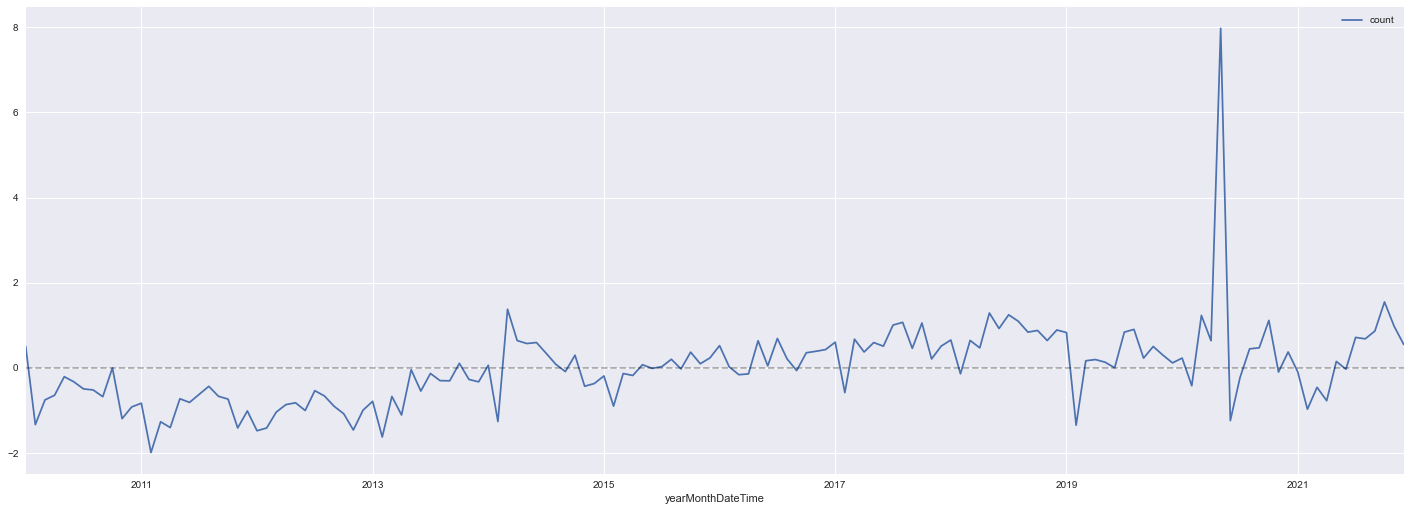

In [160]:
# Create a time series line plot for finalDataFrame
finalDataFrame.plot(figsize = (22,8))
plt.axhline(0,linestyle='--',color ='k',alpha= 0.3)
plt.show()

In [164]:
#Grouping and Visualizing time series data
#let's group the data by year and create a line plot for each year for direct comparison.
year_groups = finalDataFrame.groupby(pd.Grouper(freq ='A'))

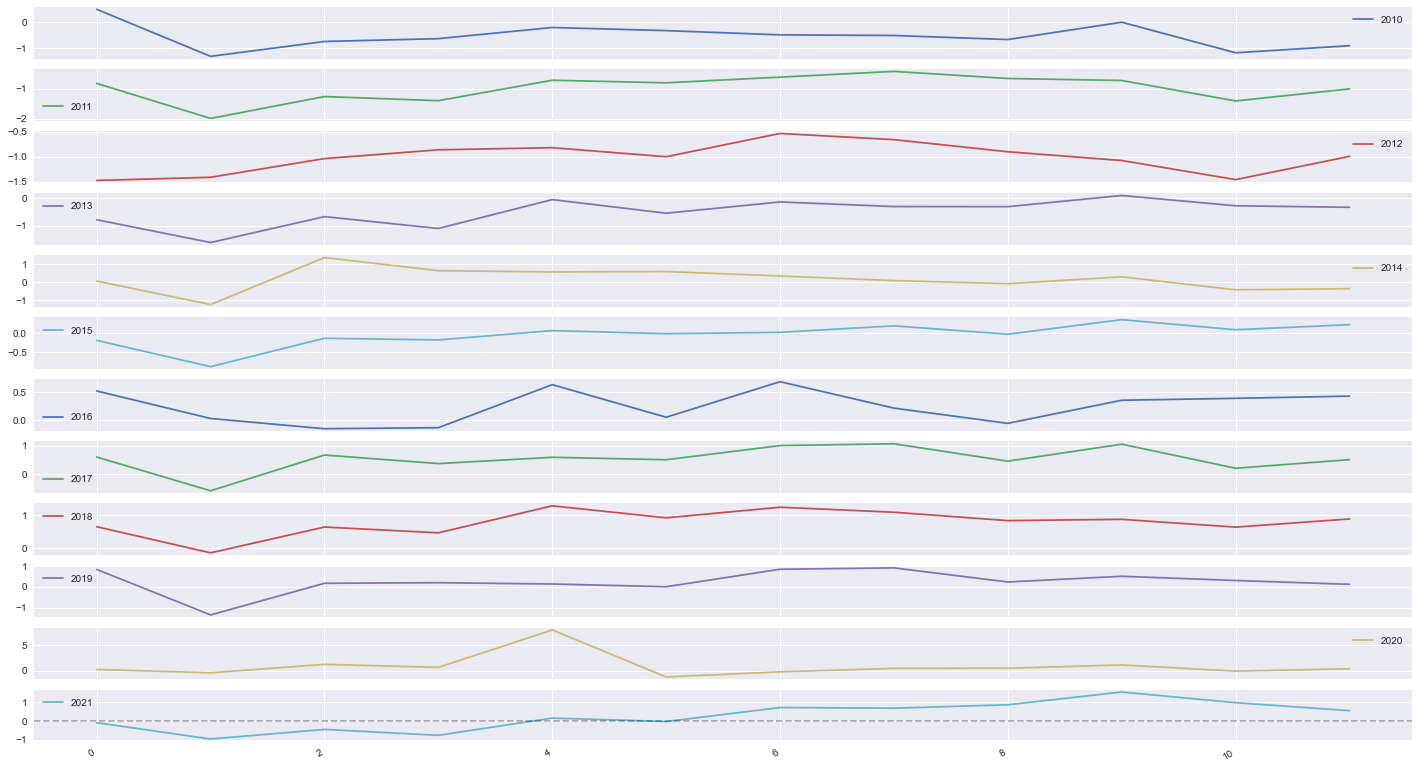

In [175]:
# Create a new DataFrame and store yearly values in columns  
crime_annual = pd.DataFrame() 

for yr, group in year_groups:
    crime_annual[yr.year] = group.values.ravel()

# Plot the yearly groups as subplots
crime_annual.plot(figsize = (22,15), subplots=True, legend=True)
plt.axhline(0,linestyle='--',color ='k',alpha= 0.3)
plt.show()

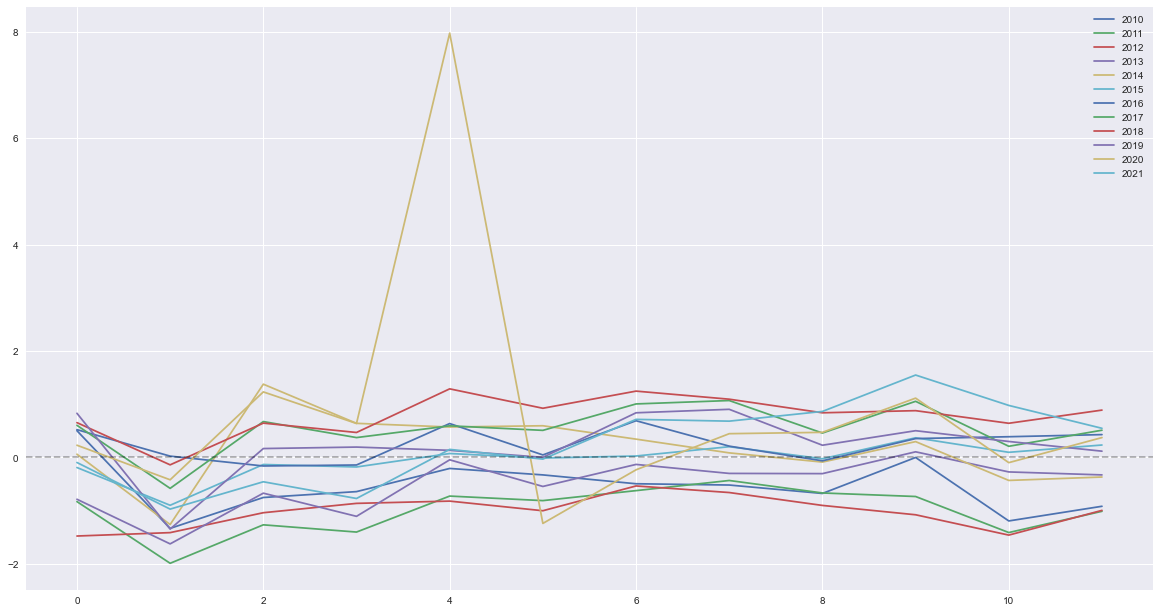

In [176]:
# Plot all years on the same graph
crime_annual.plot(figsize = (18,10), subplots=False, legend=True)
plt.axhline(0,linestyle='--',color ='k',alpha= 0.3)
plt.show()

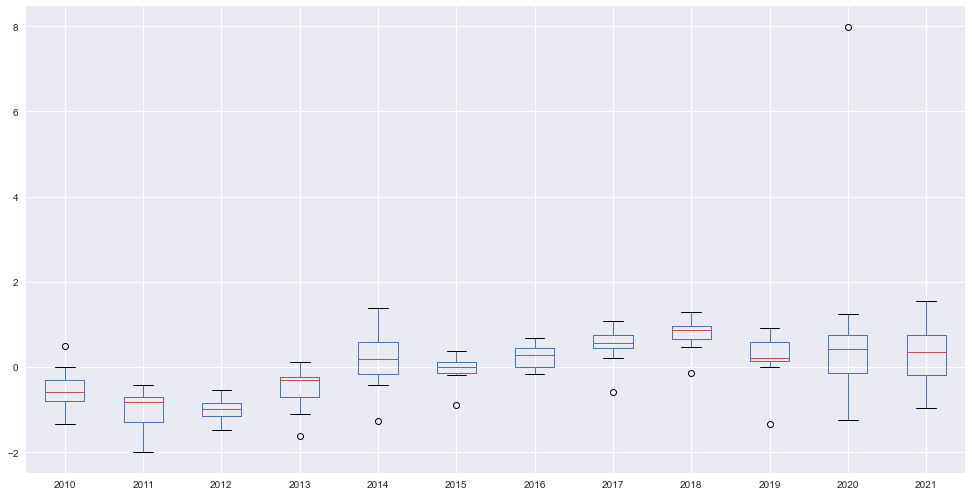

In [178]:
# Generate a box and whiskers plot for finalDataFrame
crime_annual.boxplot(figsize = (15,8))
plt.show()

* Visualize the time series
* Seasonal Decomposition
* Trends - What is the overall trend in the data?

* Seasonality - How does crimes fluctuate between seasons?

* Residuals - When removing trends and seasonaility what does the data look like?

### Time Series Decomposition
Time series decomposition is a mathematical procedure that transforms a time series into multiple different time  series. The original time series is often split into three component series:
* Seasonal: 
* Trend: 
* Random: 

#### Since the time series  doesn't seems to have a linear trend we will used model as 'Multiplicable.
By visualization, if the time series is having exponential growth or decrement with time then the time series can be considered as the multiplicative time series. 

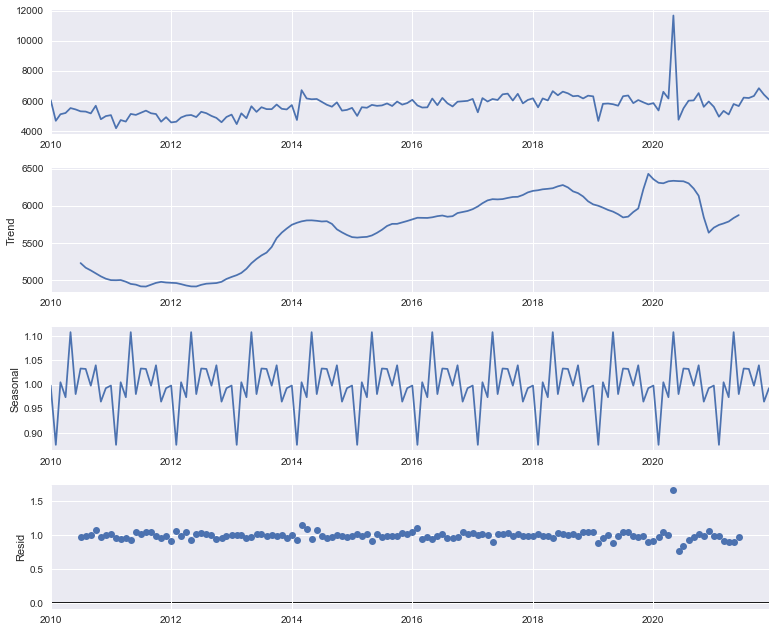

In [128]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = 11, 9
decomposition = seasonal_decompose(finalDataFrame,model='multiplicable')
decomposition.plot()
plt.show()

Trends - An almost linear incline in the number of monthly violent crimes,with declining rate for some months.

Seasonality - It looks like there correlation with seasons with a peak in the summer months and a trough in the winter months

Residuals - This mostly looks like noise, however we can improve on this,

### Create a stationarity check

* Augmented Dickey-Fuller (ADF) Test

In [129]:
# Create a function to check for the stationarity of a given time series using rolling stats and DF test
# Collect and package the code from previous labs

def stationarity_check(series):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = series.rolling(window=8, center=False).mean()
    roll_std = series.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(series,autolag='AIC')
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(series, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

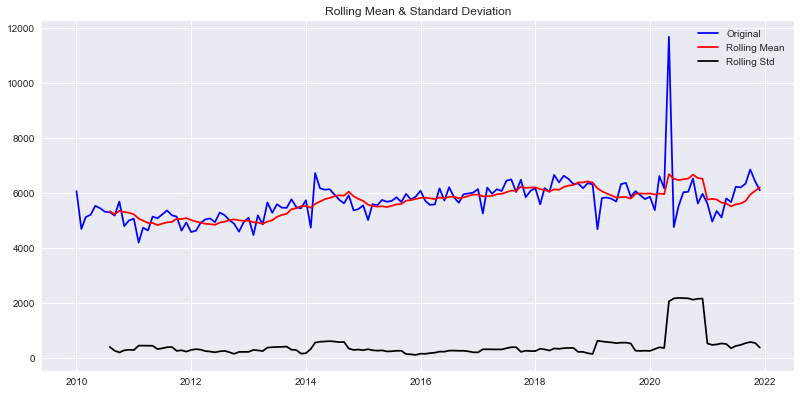

Results of Dickey-Fuller Test: 

Test Statistic                  -2.529663
p-value                          0.108423
#Lags Used                       4.000000
Number of Observations Used    139.000000
Critical Value (1%)             -3.478294
Critical Value (5%)             -2.882568
Critical Value (10%)            -2.577983
dtype: float64


In [130]:
stationarity_check(finalDataFrame)

Unsurprisingly the data fails the augmeneted Dickey-Fuller Test (T-Statistic > Critical value 1% )

### Eliminating the trend:

In [170]:
#Let's try to normalise data by getting average and standard deviation.
avg, dev = finalDataFrame.mean() ,finalDataFrame.std()

In [171]:
finalDataFrame1 =(finalDataFrame - avg)/dev

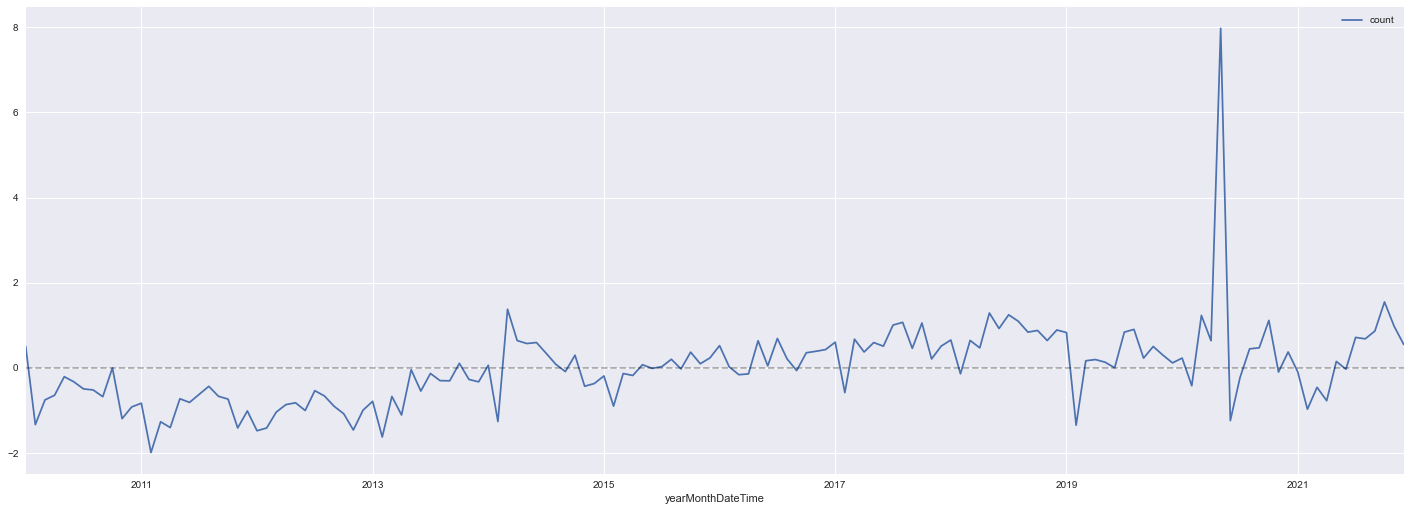

In [172]:
finalDataFrame1.plot(figsize = (22,8))
plt.axhline(0,linestyle='--',color ='k',alpha= 0.3)
plt.show()

In [179]:
finalDataFrame = finalDataFrame1.diff().dropna()

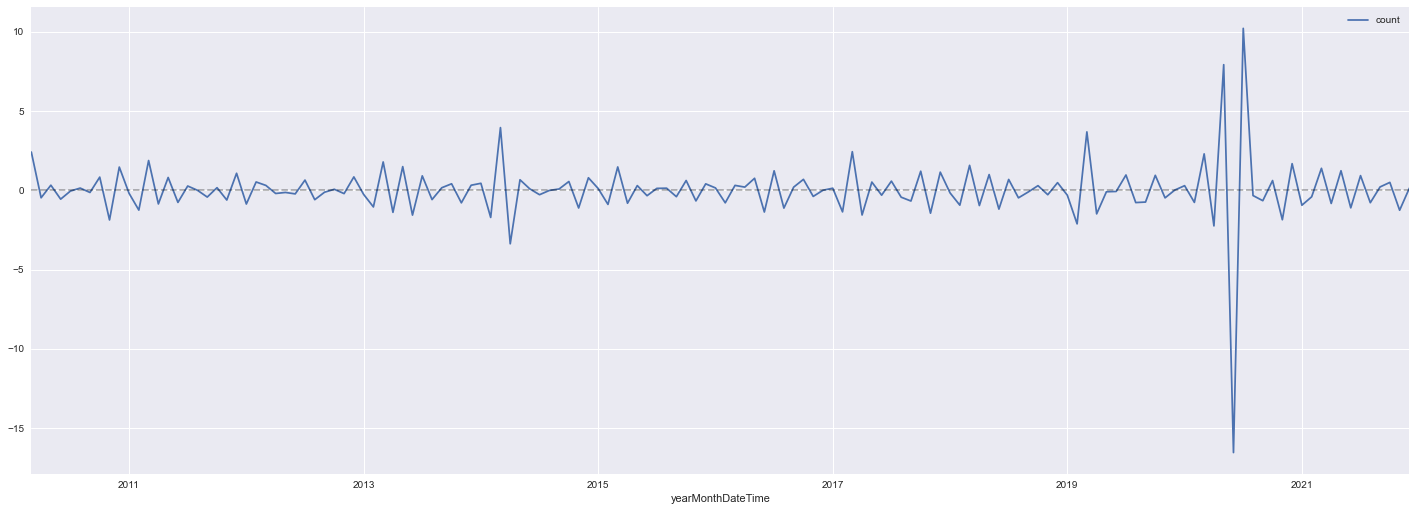

In [180]:
finalDataFrame.plot(figsize = (22,8))
plt.axhline(0,linestyle='--',color ='k',alpha= 0.3)
plt.show()

In [181]:
annual_volatility = finalDataFrame.groupby(finalDataFrame.index.year).std()

In [182]:
annual_volatility

,count
yearMonthDateTime,
2010,1.174162
2011,0.900556
2012,0.501945
2013,1.089504
2014,1.729348
2015,0.676599
2016,0.778844
2017,1.222047
2018,0.842506


In [188]:
annual_crime_vol= finalDataFrame.index.map(lambda d: annual_volatility.loc[d.year])

In [189]:
annual_crime_vol

Index([ [1.174162453129109],  [1.174162453129109],  [1.174162453129109],
        [1.174162453129109],  [1.174162453129109],  [1.174162453129109],
        [1.174162453129109],  [1.174162453129109],  [1.174162453129109],
        [1.174162453129109],
       ...
       [0.9395342997722627], [0.9395342997722627], [0.9395342997722627],
       [0.9395342997722627], [0.9395342997722627], [0.9395342997722627],
       [0.9395342997722627], [0.9395342997722627], [0.9395342997722627],
       [0.9395342997722627]],
      dtype='object', name='yearMonthDateTime', length=142)

In [145]:
# Using scipy: Subtract the line of best fit
from scipy import signal
from matplotlib import pyplot 
x = finalDataFrame.values
y=(signal.detrend(x, axis=-1, type='linear', bp=0))
y 

array([[1.81898940e-12],
       [1.81898940e-12],
       [1.81898940e-12],
       [1.81898940e-12],
       [2.72848411e-12],
       [1.81898940e-12],
       [1.81898940e-12],
       [9.09494702e-13],
       [1.81898940e-12],
       [9.09494702e-13],
       [1.81898940e-12],
       [1.81898940e-12],
       [1.81898940e-12],
       [1.81898940e-12],
       [1.81898940e-12],
       [1.81898940e-12],
       [1.81898940e-12],
       [9.09494702e-13],
       [1.81898940e-12],
       [1.81898940e-12],
       [1.81898940e-12],
       [2.72848411e-12],
       [1.81898940e-12],
       [1.81898940e-12],
       [1.81898940e-12],
       [1.81898940e-12],
       [1.81898940e-12],
       [1.81898940e-12],
       [1.81898940e-12],
       [1.81898940e-12],
       [1.81898940e-12],
       [9.09494702e-13],
       [1.81898940e-12],
       [1.81898940e-12],
       [9.09494702e-13],
       [1.81898940e-12],
       [1.81898940e-12],
       [1.81898940e-12],
       [1.81898940e-12],
       [1.81898940e-12],


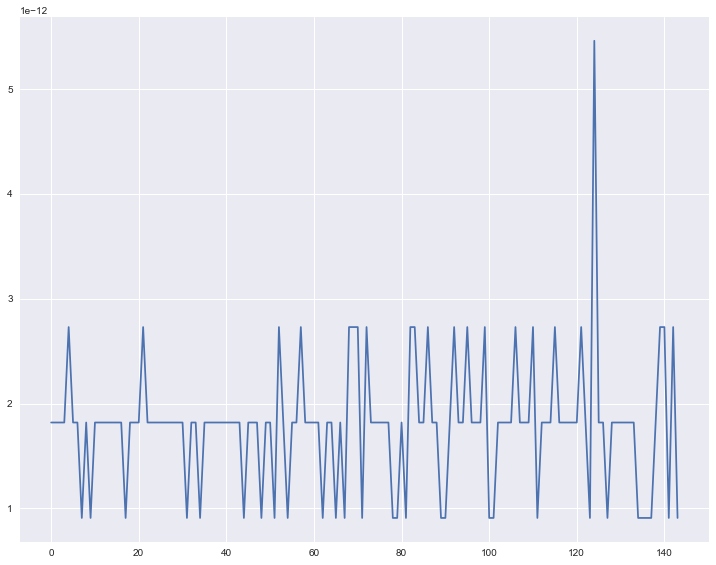

In [146]:
pyplot.plot(y)
pyplot.show()